In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import pandas as pd
import numpy as np
%matplotlib inline


In [73]:
X,y=make_blobs(n_samples=1000, centers =3, n_features=2, random_state=23)

In [74]:
X.shape

(1000, 2)

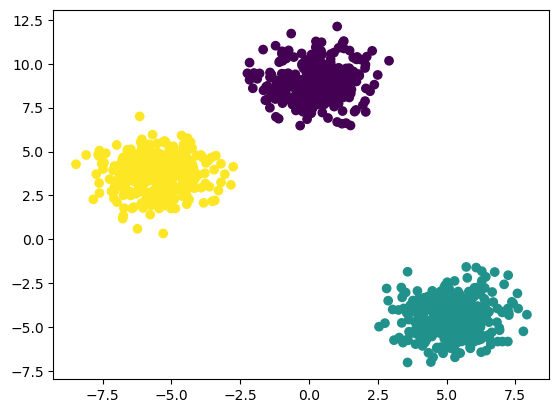

In [75]:
plt.scatter(X[:,0],X[:,1], c=y)

In [76]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X , y, test_size=0.33 , random_state = 42)

In [77]:
from sklearn.cluster import KMeans

In [78]:
#Manual process (elbow method)

In [79]:
wcss=[]
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init = 'k-means++')
    kmeans.fit(X_train)
    wcss.append(kmeans.inertia_)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

In [80]:
wcss

[34827.57682552022,
 7935.4372861454185,
 1319.2730531585607,
 1140.467788465513,
 991.8899785187884,
 853.5164775837801,
 757.5478747725864,
 663.8015944050543,
 577.9230450137771,
 533.5053774785112]

<function matplotlib.pyplot.show(close=None, block=None)>

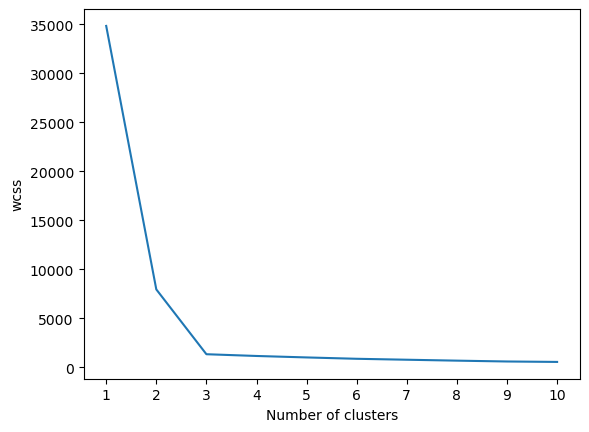

In [81]:
## plot elbow curve
plt.plot(range(1,11),wcss)
plt.xticks(range(1,11))
plt.xlabel("Number of clusters")
plt.ylabel("wcss")
plt.show

In [82]:
# k =3 is our no. of clusters

In [83]:
kmeans=KMeans(n_clusters=3,init="k-means++")

In [84]:
kmeans.fit_predict(X_train)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


array([1, 1, 1, 2, 2, 2, 1, 2, 1, 1, 0, 0, 1, 1, 0, 1, 0, 2, 0, 0, 2, 0,
       0, 2, 2, 1, 1, 2, 2, 1, 2, 2, 1, 2, 0, 0, 0, 2, 2, 1, 1, 2, 1, 1,
       2, 0, 0, 1, 2, 1, 1, 0, 1, 1, 1, 1, 1, 0, 2, 2, 1, 1, 2, 1, 0, 0,
       0, 0, 2, 1, 0, 2, 1, 0, 1, 0, 2, 2, 2, 2, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 2, 0, 1, 2, 2, 0, 1, 0, 1,
       2, 0, 1, 2, 2, 2, 2, 0, 1, 0, 1, 1, 0, 2, 1, 2, 1, 0, 2, 2, 1, 2,
       2, 2, 2, 2, 2, 2, 1, 1, 0, 0, 1, 2, 0, 0, 2, 1, 0, 0, 0, 2, 0, 1,
       1, 2, 1, 0, 0, 1, 0, 2, 0, 0, 2, 2, 2, 1, 2, 2, 1, 0, 2, 2, 0, 2,
       0, 1, 0, 2, 0, 2, 1, 2, 2, 2, 0, 1, 0, 2, 1, 0, 2, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 2, 1, 1, 0, 2, 0, 0, 1, 2, 1, 2, 1, 2, 0, 1, 2, 0,
       2, 1, 1, 2, 2, 0, 2, 1, 0, 0, 1, 0, 2, 1, 0, 2, 1, 1, 1, 1, 0, 1,
       1, 2, 1, 0, 0, 2, 1, 2, 1, 1, 2, 2, 2, 1, 0, 0, 2, 2, 2, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 2, 0, 0, 0, 0, 2, 1, 2, 0, 2, 1, 2, 2, 0, 2, 0,
       0, 2, 2, 1, 1, 1, 2, 0, 2, 0, 1, 1, 1, 1, 2,

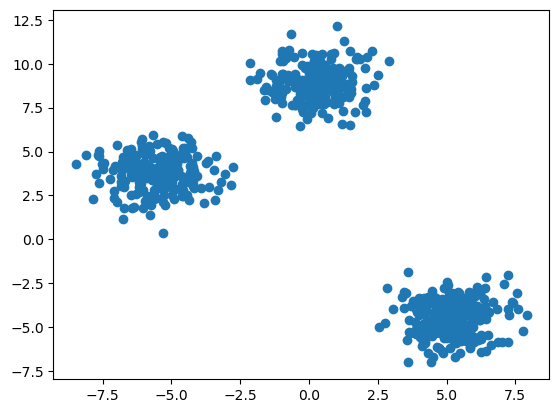

In [85]:
plt.scatter(X_train[:,0],X_train[:,1])

In [86]:
y_test_labels = kmeans.predict(X_test)

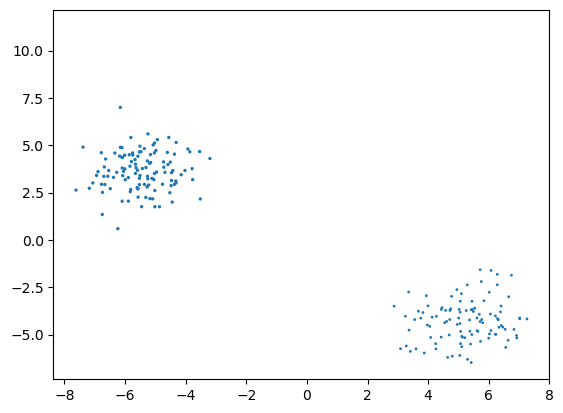

In [87]:
plt.scatter(X_test[:,0],X_test[:,1],y_test_labels)

In [65]:
## knee locator
!pip install kneed 

Defaulting to user installation because normal site-packages is not writeable


In [88]:
from kneed import KneeLocator

In [89]:
kl=KneeLocator(range(1,11),wcss,curve='convex', direction = 'decreasing')
kl.elbow

3

In [90]:
#performance matric silhouette score
from sklearn.metrics import silhouette_score

In [91]:
silhouette_coefficients=[]
for k in range(2,11):
    kmeans=KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(X_train)
    score=silhouette_score(X_train,kmeans.labels_)
    silhouette_coefficients.append(score)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

In [92]:
silhouette_coefficients

[0.7281443868598331,
 0.8071181203797672,
 0.6357733426488265,
 0.4907093255057165,
 0.33691828928108863,
 0.34060209978059164,
 0.34250557655657293,
 0.3415838215177012,
 0.34101810347696]

<function matplotlib.pyplot.show(close=None, block=None)>

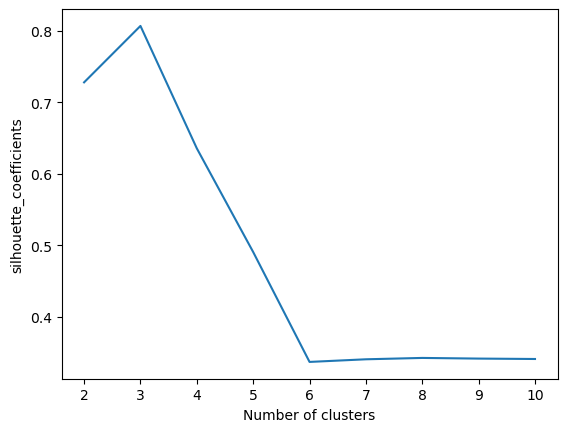

In [93]:
plt.plot(range(2,11),silhouette_coefficients)
plt.xticks(range(2,11))
plt.xlabel("Number of clusters")
plt.ylabel("silhouette_coefficients")
plt.show

In [72]:
#we got 80% for 3 